In [ ]:
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install scipy

In [ ]:
import shutil
import os
from scipy import *
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
from os import listdir, sep
from os.path import abspath, basename, isdir
def tree(dir, padding= '  ', print_files=False):
    """
    Эта функция строит дерево поддиректорий и файлов для заданной директории

    Параметры
    ----------
    dir : str
        Path to needed directory
    padding : str
        String that will be placed in print for separating files levels
    print_files : bool
        "Print or not to print" flag
    """
    cmd = "find '%s'" % dir
    files = os.popen(cmd).read().strip().split('\n')
    padding = '|  '
    for file in files:
        level = file.count(os.sep)
        pieces = file.split(os.sep)
        symbol = {0:'', 1:'/'}[isdir(file)]
        if not print_files and symbol != '/':
            continue
        print(padding*level + pieces[-1] + symbol)

In [ ]:
def plot_cats_dogs_samples(train_dir, N=4):
  """
    Эта функция строит N самплов каждого класса из датасета Cats vs Dogs

    Параметры
    ----------
    train_dir : str
        Directory with train Cats vs Dogs dataset
    N : int
        Number of samples for each class
  """
  import random
  fig, ax = plt.subplots(3,N,figsize=(3*N,3*2))

  for i,name in enumerate(['rock','paper', 'scissors']):
    filenames = os.listdir(os.path.join(train_dir,name))

    for j in range(N):
      sample = random.choice(filenames)
      image = load_img(os.path.join(train_dir,name,sample))
      ax[i][j].imshow(image)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
      ax[i][j].set_title(name)
  plt.grid(False)
  plt.show()

In [ ]:
# Импортируем функцию для загрузки картинок из файлов и генератор картинок
from keras.preprocessing.image import load_img, ImageDataGenerator

In [ ]:
# Каталог с данными для обучения
train_dir = 'sample_data/data/train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'sample_data/data/test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 5
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 1264
# Количество изображений для проверки
nb_validation_samples = 317
# Количество изображений для тестирования
nb_test_samples = 317

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/Python/data.zip -d sample_data

Archive:  drive/MyDrive/Python/data.zip
   creating: sample_data/data/
  inflating: sample_data/__MACOSX/._data  
  inflating: sample_data/data/.DS_Store  
  inflating: sample_data/__MACOSX/data/._.DS_Store  
   creating: sample_data/data/test/
  inflating: sample_data/__MACOSX/data/._test  
   creating: sample_data/data/train/
  inflating: sample_data/__MACOSX/data/._train  
  inflating: sample_data/data/test/.DS_Store  
  inflating: sample_data/__MACOSX/data/test/._.DS_Store  
   creating: sample_data/data/test/hockey_puck/
  inflating: sample_data/__MACOSX/data/test/._hockey_puck  
   creating: sample_data/data/test/american_football/
  inflating: sample_data/__MACOSX/data/test/._american_football  
   creating: sample_data/data/test/tennis_ball/
  inflating: sample_data/__MACOSX/data/test/._tennis_ball  
  inflating: sample_data/data/train/.DS_Store  
  inflating: sample_data/__MACOSX/data/train/._.DS_Store  
   creating: sample_data/data/train/hockey_puck/
  inflating: sample_data

In [ ]:
base_dir = 'sample_data/data'

classes = {
    0: 'теннисный мяч',
    1: 'хоккейная шайба',
    2: 'мяч американского футбола',
}

train_dir = os.path.join(base_dir, 'train')

test_dir = os.path.join(base_dir, 'test')

|  |  train/
|  |  |  tennis_ball/
|  |  |  hockey_puck/
|  |  |  american_football/


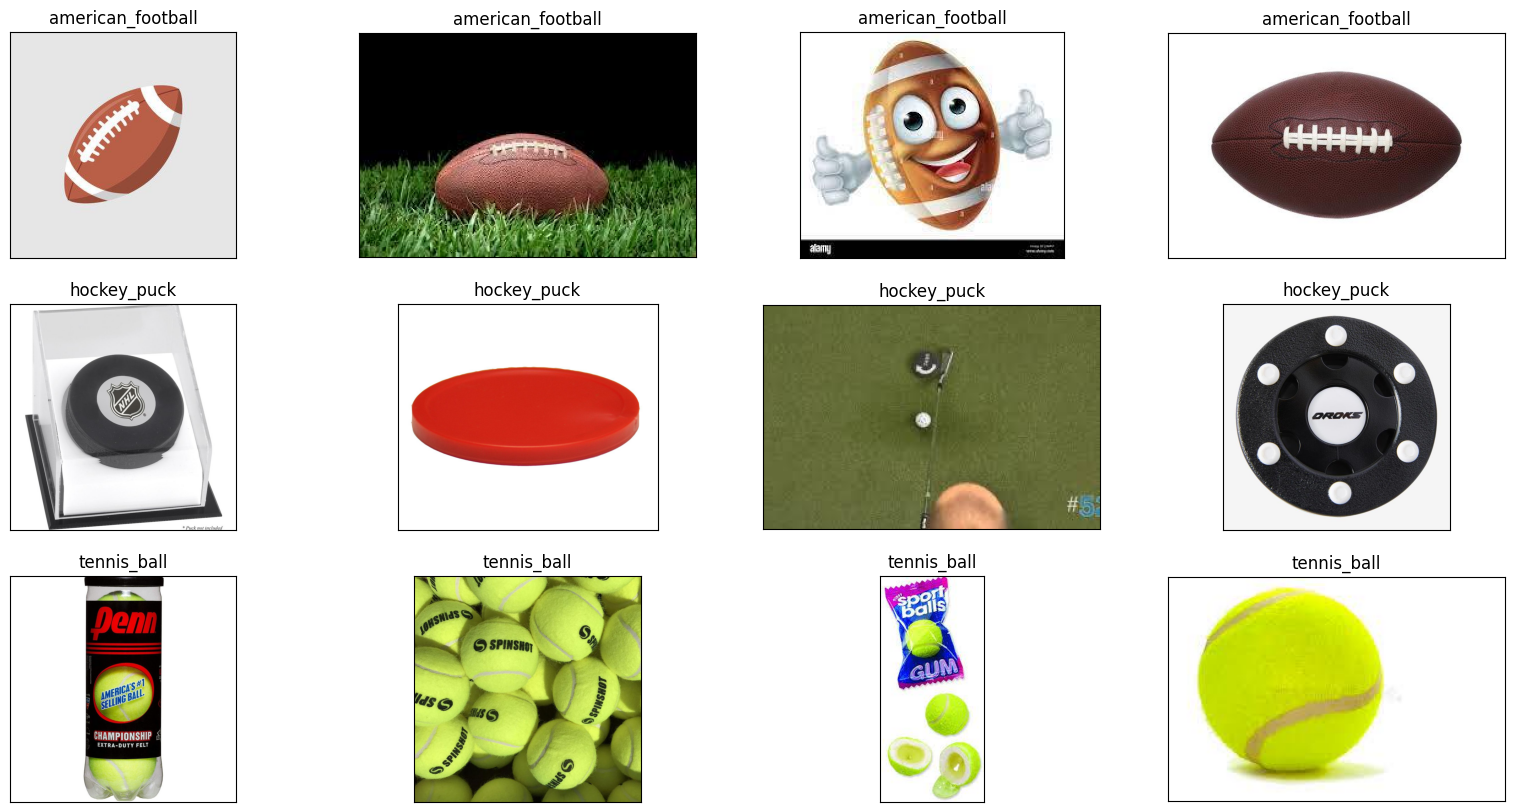

In [ ]:
# Посмотрим, как именно расположены директории с датасетом относительно друг друга
tree(train_dir,print_files=False)
N=4
import random
fig, ax = plt.subplots(3,N,figsize=(5*N,5*2))

for i,name in enumerate(['american_football','hockey_puck','tennis_ball']):
    filenames = os.listdir(os.path.join(train_dir,name))
    for j in range(N):
      sample = random.choice(filenames)
      image = load_img(os.path.join(train_dir,name,sample))
      ax[i][j].imshow(image)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
      ax[i][j].set_title(name)
plt.grid(False)
plt.show()

In [ ]:
import tensorflow as tf

conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape))
conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(input_shape))
conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
flatten = tf.keras.layers.Flatten()
dense1 = tf.keras.layers.Dense(64, activation='relu')
dropout = tf.keras.layers.Dropout(0.25)
output = tf.keras.layers.Dense(3, activation='softmax')

model = tf.keras.models.Sequential([
  conv1,
  conv2,
  pool2,
  flatten,
  dense1,
  dropout,
  output
])

#Cкомпилируем модель с выбранными параметрами. Также укажем метрику для оценки.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 64)                21827648  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1264 images belonging to 3 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    #val_dir,
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 317 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15)

Epoch 1/15
79/79 [==============================] - 18s 75ms/step - loss: 1.7382 - accuracy: 0.5894
Epoch 2/15
79/79 [==============================] - 5s 63ms/step - loss: 0.5851 - accuracy: 0.7927
Epoch 3/15
79/79 [==============================] - 5s 67ms/step - loss: 0.3206 - accuracy: 0.8972
Epoch 4/15
79/79 [==============================] - 5s 59ms/step - loss: 0.1609 - accuracy: 0.9533
Epoch 5/15
79/79 [==============================] - 6s 72ms/step - loss: 0.1025 - accuracy: 0.9668
Epoch 6/15
79/79 [==============================] - 6s 72ms/step - loss: 0.0608 - accuracy: 0.9850
Epoch 7/15
79/79 [==============================] - 5s 68ms/step - loss: 0.0902 - accuracy: 0.9802
Epoch 8/15
79/79 [==============================] - 6s 81ms/step - loss: 0.0658 - accuracy: 0.9810
Epoch 9/15
79/79 [==============================] - 5s 59ms/step - loss: 0.0601 - accuracy: 0.9834
Epoch 10/15
79/79 [==============================] - 5s 60ms/step - loss: 0.0236 - accuracy: 0.9945
Epoch 11

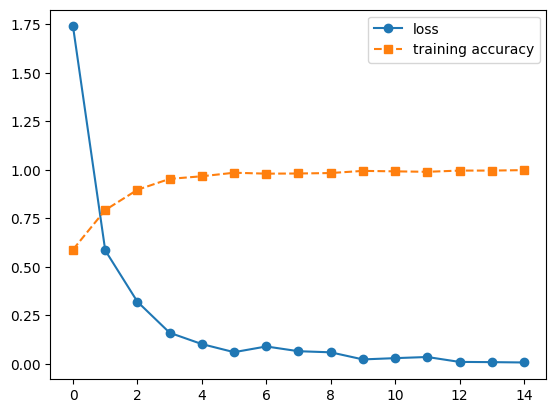

In [ ]:
plt.plot(history.history['loss'], '-o', label='loss')
plt.plot(history.history['accuracy'], '--s', label='training accuracy')
plt.legend();

In [ ]:
model.evaluate(test_generator)

20/20 [==============================] - 2s 84ms/step - loss: 1.7241 - accuracy: 0.7129


[1.724107265472412, 0.7129337787628174]

In [ ]:
from IPython.display import Image
from keras.preprocessing import image

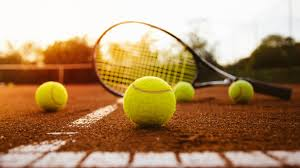

In [ ]:
Image ('/content/drive/MyDrive/Python/tennis_ball.jpg')

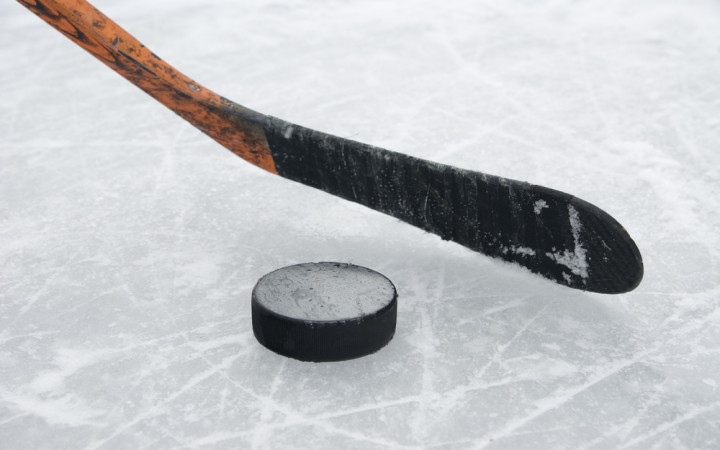

In [ ]:
Image ('/content/drive/MyDrive/Python/hockey_puck.jpg')

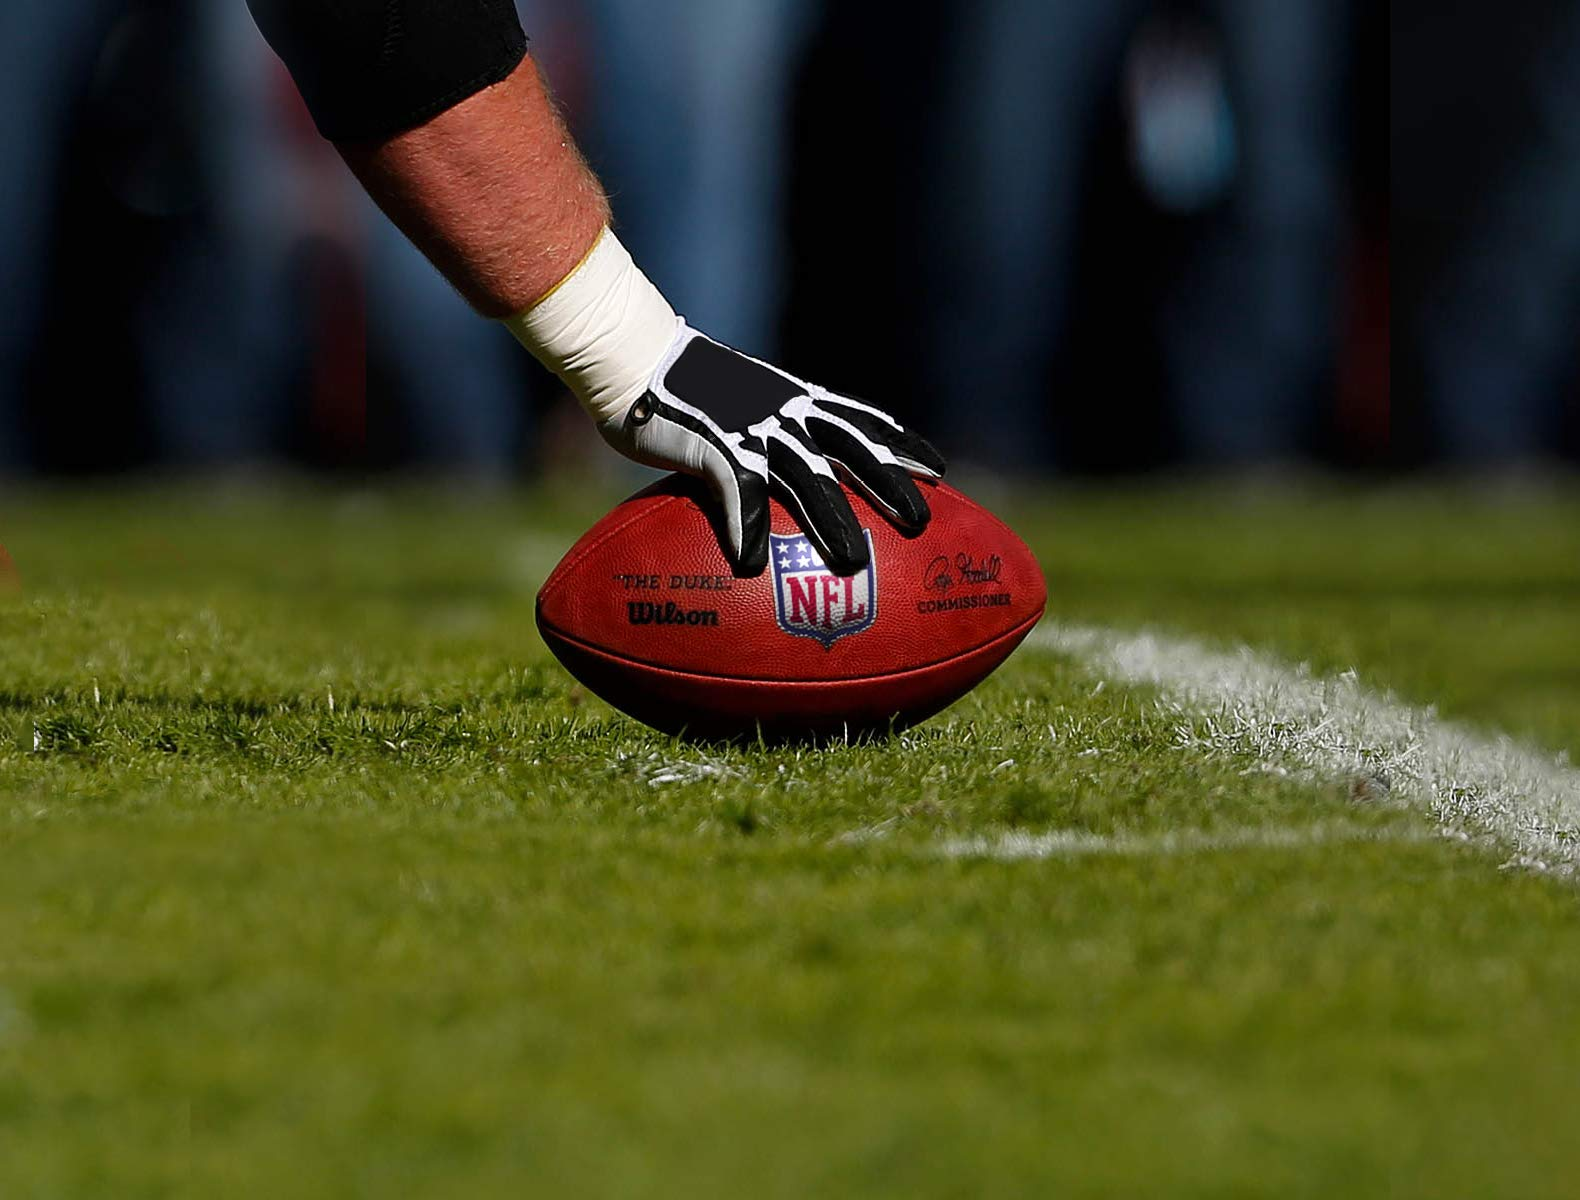

In [ ]:
Image ('/content/drive/MyDrive/Python/american_football.jpg')

In [ ]:
tennis_ball_img_path = '/content/drive/MyDrive/Python/tennis_ball.jpg'
hockey_puck_img_path = '/content/drive/MyDrive/Python/hockey_puck.jpg'
american_football_img_path = '/content/drive/MyDrive/Python/american_football.jpg'

In [ ]:
import numpy as np

def preprocess_image(image_path, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size, grayscale=False)
    x = image.img_to_array(img)
    x = 255 - x
    x /= 255
    x = np.expand_dims(x, axis=0)
    return x

def predict_class(image_path, model, classes):
    x = preprocess_image(image_path)
    prediction = model.predict(x)
    index = np.argmax(prediction)
    class_name = classes[index]
    return index, class_name

# Пути к изображениям и классы
images = [tennis_ball_img_path, hockey_puck_img_path, american_football_img_path]

# Предсказание для каждого изображения
for image_path in images:
    index, class_name = predict_class(image_path, model, classes)
    print("Изображение:", image_path)
    print("Индекс класса:", index)
    print("Название класса:", class_name)

1/1 [==============================] - 0s 17ms/step
Изображение: /content/drive/MyDrive/Python/tennis_ball.jpg
Индекс класса: 0
Название класса: теннисный мяч
1/1 [==============================] - 0s 16ms/step
Изображение: /content/drive/MyDrive/Python/hockey_puck.jpg
Индекс класса: 1
Название класса: хоккейная шайба
1/1 [==============================] - 0s 18ms/step
Изображение: /content/drive/MyDrive/Python/american_football.jpg
Индекс класса: 2
Название класса: мяч американского футбола


In [ ]:
print("Сохраняем сеть")
# Сохраняем сеть для последующего использования
# Генерируем описание модели в формате json
model_json = model.to_json()
json_file = open("balls.json", "w")
# Записываем архитектуру сети в файл
json_file.write(model_json)
json_file.close()
# Записываем данные о весах в файл
model.save_weights("balls.h5")
print("Сохранение сети завершено")

Сохраняем сеть
Сохранение сети завершено
